In [56]:
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

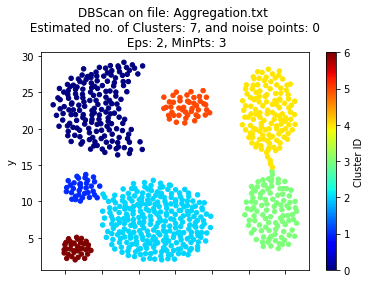

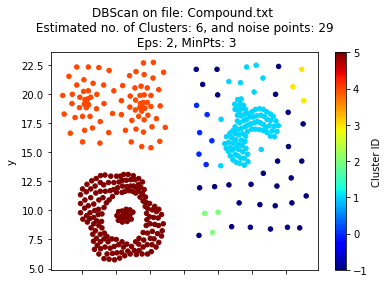

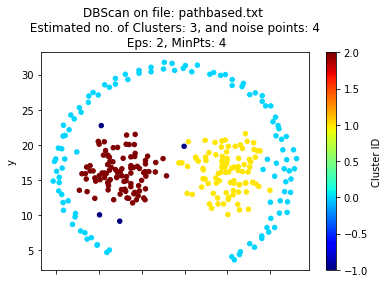

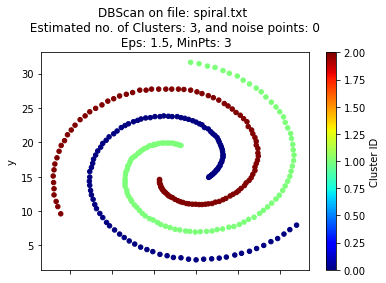

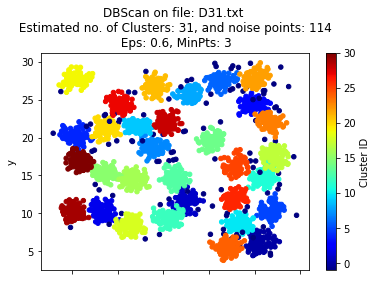

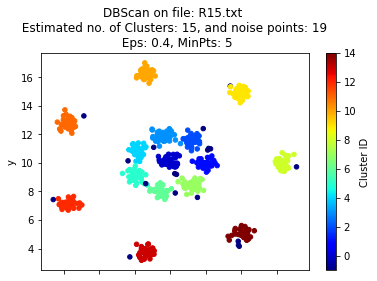

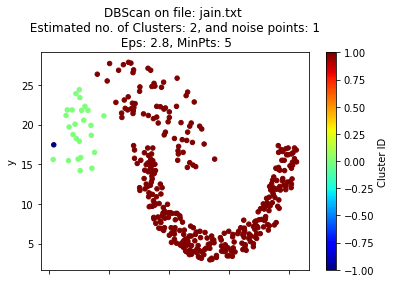

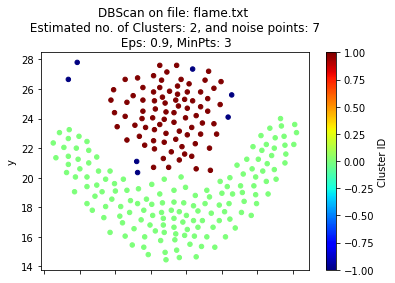

In [137]:
file_name_list=["Aggregation.txt","Compound.txt","pathbased.txt","spiral.txt","D31.txt","R15.txt","jain.txt","flame.txt"]

# set DBScan parameters 
eps_list=[2,2,2,1.5,0.6,0.4,2.8,0.9]
min_sample_list=[3,3,4,3,3,5,5,3]

file_path="/Users/ehsanmos/Documents/CS_courses_UNR/Fall2019/data_mining/HW/HW4/dbscan/"

for counter,file_name in enumerate(file_name_list):
    #print(counter,file_name)
    
    in_file=file_path+file_name
    in_file=np.loadtxt(in_file)
    # in_array=np.array(in_file)
    input_df=pd.DataFrame(in_file, columns=['x','y','labels'])
    #print(input_df.shape)
    #print('number of data samples = %s' %input_df.shape[0])
    #print(input_df.head)
    
    my_eps = eps_list[counter]
    my_min_samples = min_sample_list[counter]
    
    # build DBScan class
    db = DBSCAN(eps=my_eps, min_samples=my_min_samples).fit(input_df)
    #print(type(db))
    
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool) # create a zero array
    #print(core_samples_mask)
    labels = db.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    # print('estimated no. of clusters = %s' %n_clusters)
    n_noise = list(labels).count(-1)
    # print('estimated no. of noise points = %s' %n_noise)

    core_samples_mask[db.core_sample_indices_] = True
    #print(core_samples_mask)

    labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
    result = pd.concat((input_df,labels), axis=1)
    #print(result.head)
    result.plot.scatter(x='x',y='y',c='Cluster ID', colormap='jet')
    plt.title('DBScan on file: %s \n Estimated no. of Clusters: %d, and noise points: %s \n Eps: %s, MinPts: %s' %(file_name,n_clusters,n_noise,my_eps,my_min_samples))
